https://www.datatechnotes.com/2019/07/ridge-regression-example-in-python.html

In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print("Boston housing dataset prediction.")
boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1]

Boston housing dataset prediction.


In [3]:
from sklearn.linear_model import Ridge, RidgeCV
for a in alphas:
    model = Ridge(alpha=a, normalize=True).fit(x,y) 
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y) 
    print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.000001, R2:0.741, MSE:21.89, RMSE:4.68
Alpha:0.000010, R2:0.741, MSE:21.89, RMSE:4.68
Alpha:0.000100, R2:0.741, MSE:21.89, RMSE:4.68
Alpha:0.001000, R2:0.741, MSE:21.90, RMSE:4.68
Alpha:0.010000, R2:0.740, MSE:21.92, RMSE:4.68
Alpha:0.100000, R2:0.732, MSE:22.66, RMSE:4.76
Alpha:0.500000, R2:0.686, MSE:26.48, RMSE:5.15
Alpha:1.000000, R2:0.635, MSE:30.81, RMSE:5.55


### It's better to set normalize = True 

 Alpha is an important factor in regularization. It defines Ridge shrinkage or regularization strength. The higher value means the stronger regularization. We don't know which value works efficiently for our regularization method. Thus we'll figure out the best alpha value by checking the model accuracy with setting multiple alpha values.

alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1]

We can define Ridge model by setting alfa and fit it with x, y data. Then we check the R-squared, MSE, RMSE values for each alpha.

for a in alphas:
 model = Ridge(alpha=a, normalize=True).fit(x,y) 
 score = model.score(x, y)
 pred_y = model.predict(x)
 mse = mean_squared_error(y, pred_y) 
 print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(a, score, mse, np.sqrt(mse)))
 
Alpha:0.000001, R2:0.741, MSE:21.90, RMSE:4.68
Alpha:0.000010, R2:0.741, MSE:21.90, RMSE:4.68
Alpha:0.000100, R2:0.741, MSE:21.90, RMSE:4.68
Alpha:0.001000, R2:0.741, MSE:21.90, RMSE:4.68
Alpha:0.010000, R2:0.740, MSE:21.92, RMSE:4.68
Alpha:0.100000, R2:0.732, MSE:22.66, RMSE:4.76
Alpha:0.500000, R2:0.686, MSE:26.49, RMSE:5.15
Alpha:1.000000, R2:0.635, MSE:30.81, RMSE:5.55 

The result shows that alpha with a 0.01 is the best value we can use.

> Alpha is learning paramether 
Alpha is lamda in this formula
'>1' how stupid larger impact than the factor it self 
mse -> mean square error 


In [4]:
elastic = ElasticNet(alpha=0.01).fit(xtrain,ytrain)
ypred = elastic.predict(xtest)
score = elastic.score(xtest,ytest)
mse = mean_squared_error(ytest,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, mse,np.sqrt(mse))) 

R2:0.623, MSE:36.23, RMSE:6.02


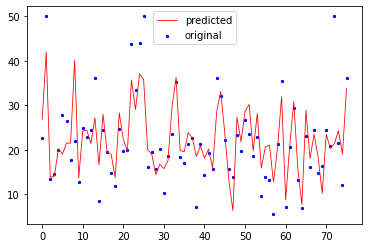

In [5]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### Automaticly select the most appropriate alpha